# Importing Libraries

In [2]:
import numpy as np, pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, roc_auc_score

# Reading and Understanding Data

In [4]:
lead_scoring_data = pd.read_csv("Leads.csv")
lead_scoring_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_scoring_data.shape

(9240, 37)

In [6]:
lead_scoring_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_scoring_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Preparation and Performing EDA

In [9]:
#Data Cleaning 
lead_scoring_data = lead_scoring_data.replace('Select', np.nan)

In [10]:
#Check null values
lead_scoring_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#null percentage of columns
round(lead_scoring_data.isnull().sum()/len(lead_scoring_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

Some columns have large percentages of missing values so it is better to drop the columns that missing value more than 40%

In [13]:
lead_scoring_data=lead_scoring_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [14]:
round(lead_scoring_data.isnull().sum()/len(lead_scoring_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

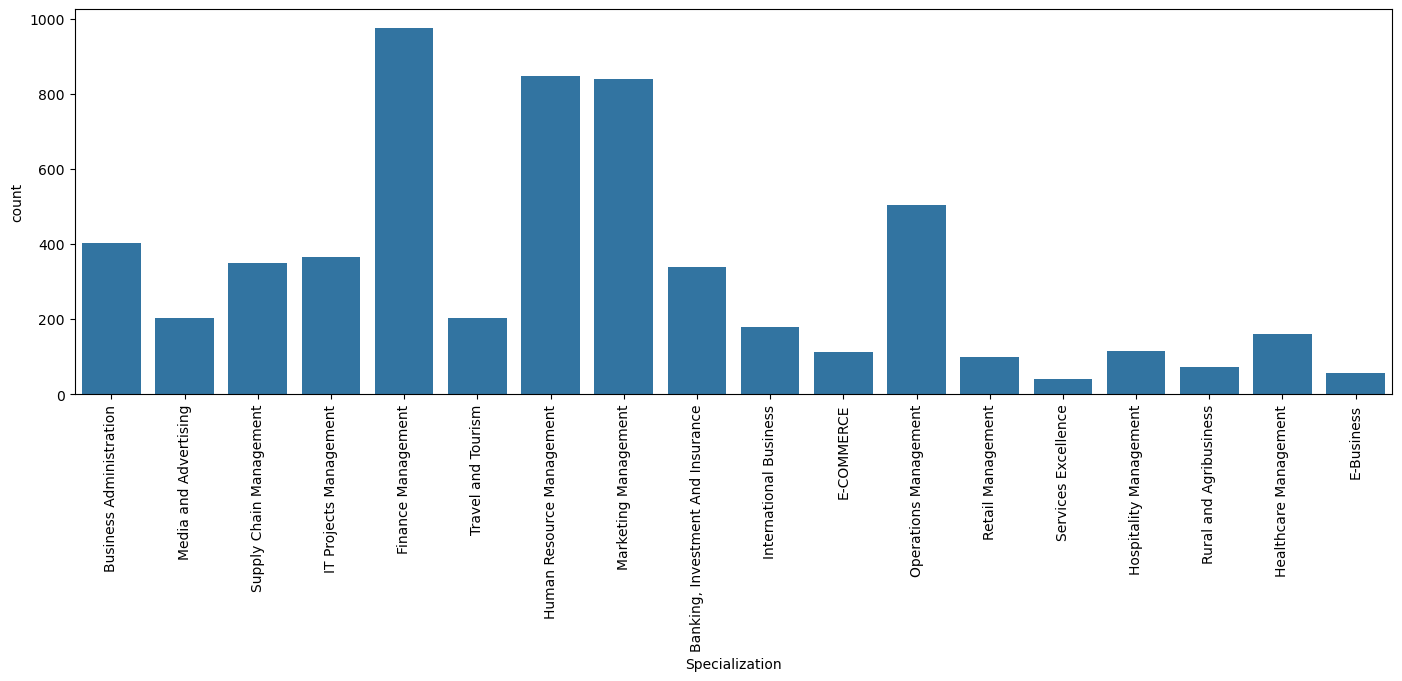

In [15]:
#Specialization column has 37% missing value
plt.figure(figsize=(17,5))
sns.countplot(x='Specialization', data=lead_scoring_data)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

As their is high percentage of missing value so another column called others is created because the lead should not leave this as blank

In [17]:
lead_scoring_data['Specialization'] = lead_scoring_data['Specialization'].replace(np.nan, 'Others')

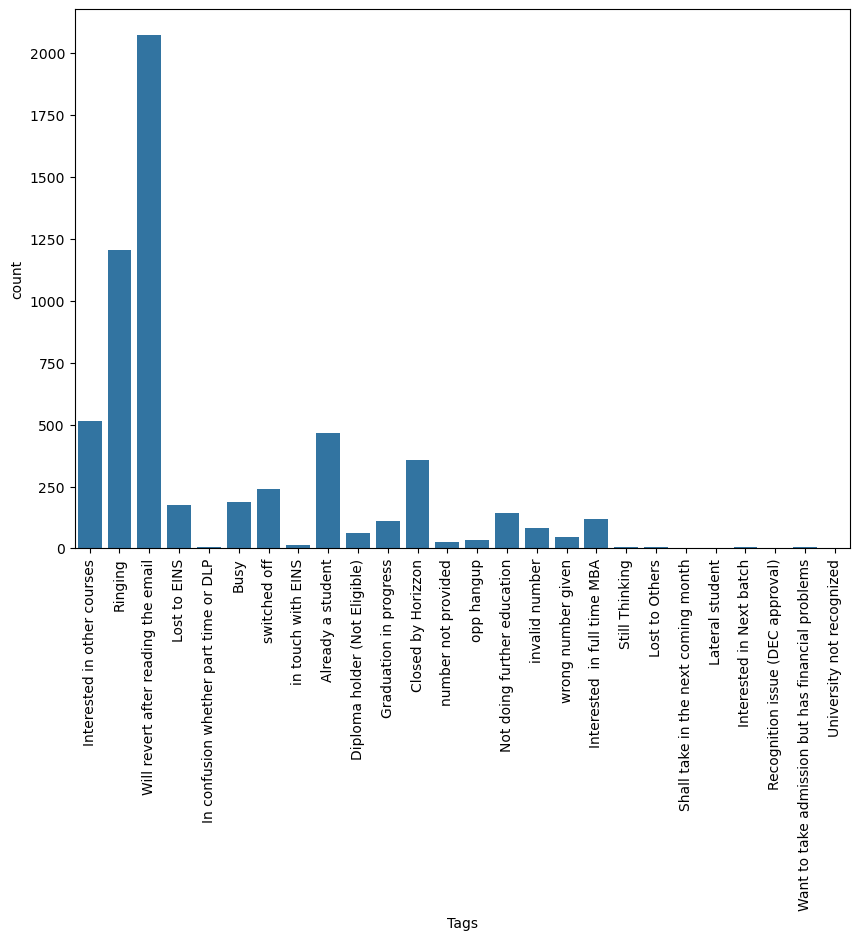

In [18]:
#Tags has 36% missing values
plt.figure(figsize=(10,7))
sns.countplot(x='Tags', data=lead_scoring_data)
plt.xticks(rotation=90)
plt.show()

Most values are from 'Will revert after reading the email' so we will replace missing data in tags column with  'Will revert after reading the email'

In [20]:
lead_scoring_data['Tags']=lead_scoring_data['Tags'].replace(np.nan,'Will revert after reading the email')

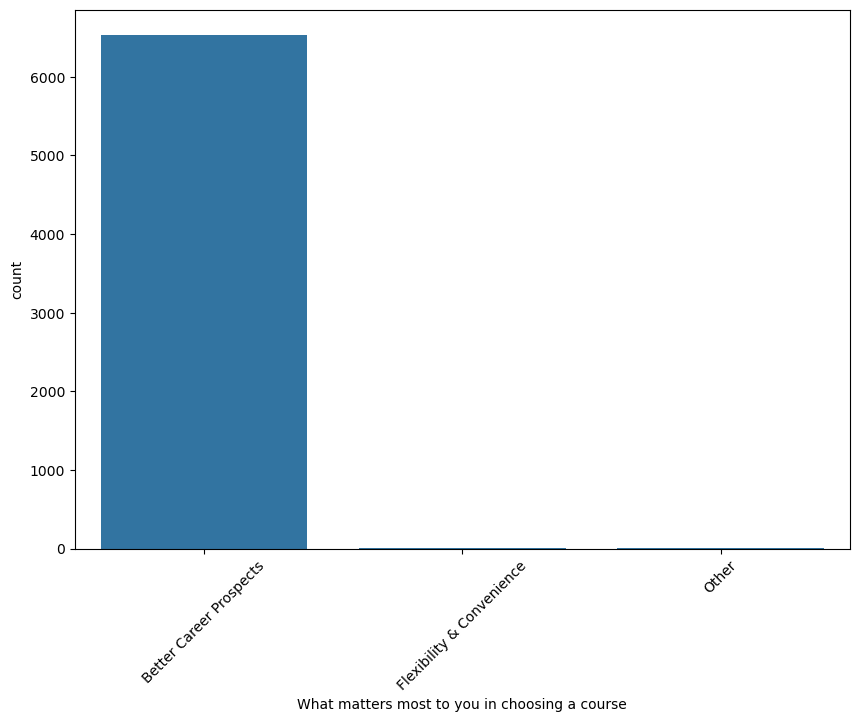

In [21]:
#What matters most to you in choosing a course has 29% missing values
plt.figure(figsize=(10,7))
sns.countplot(x='What matters most to you in choosing a course', data=lead_scoring_data)
plt.xticks(rotation=45)
plt.show()

In [22]:
round(lead_scoring_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

What matters most to you in choosing a course
Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: proportion, dtype: float64

In [23]:
#removing this high column
lead_scoring_data=lead_scoring_data.drop('What matters most to you in choosing a course',axis=1)

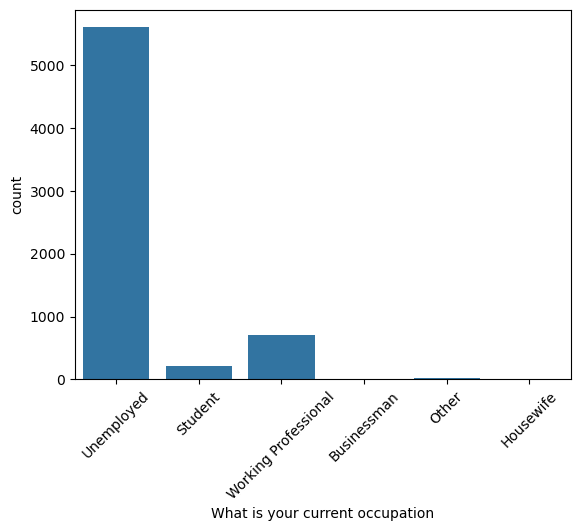

In [24]:
sns.countplot(x='What is your current occupation', data=lead_scoring_data)
plt.xticks(rotation=45)
plt.show()

In [25]:
round(lead_scoring_data['What is your current occupation'].value_counts(normalize=True),2)*100

What is your current occupation
Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

Since more values are from unmeployed so we will impute missing values as unemployed in this column

In [27]:
lead_scoring_data['What is your current occupation']=lead_scoring_data['What is your current occupation'].replace(np.nan,'Unemployed')

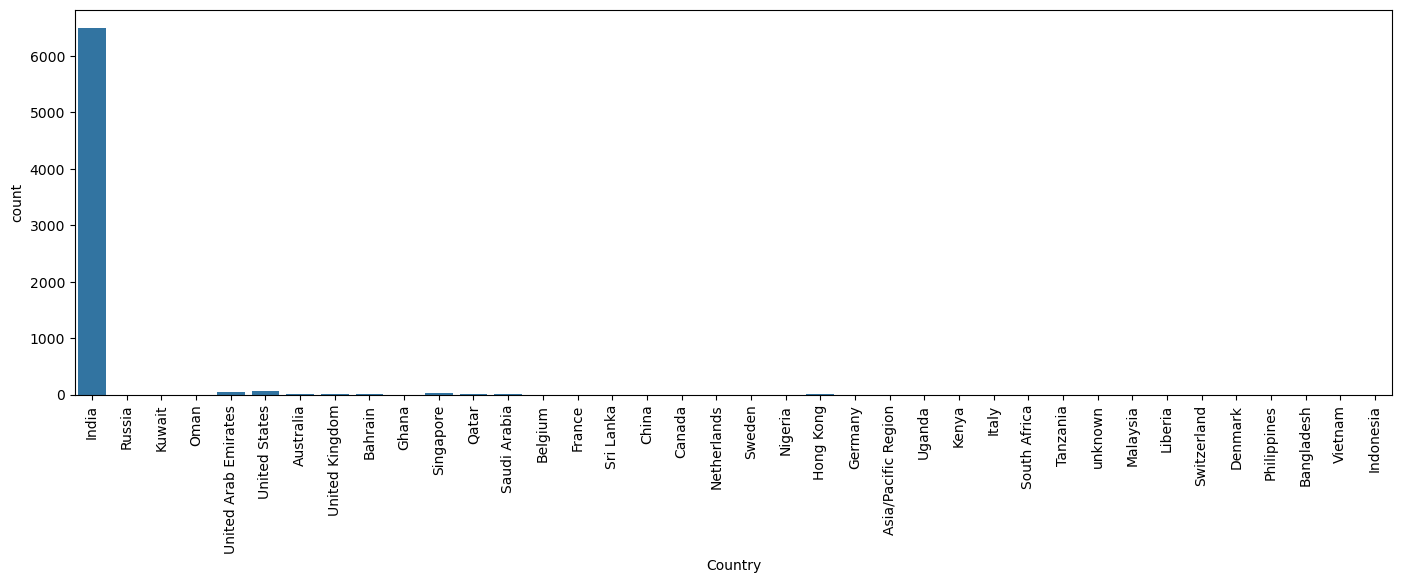

In [28]:
#Country has 27% missing values
plt.figure(figsize=(17,5))
sns.countplot(x='Country', data=lead_scoring_data)
plt.xticks(rotation=90)
plt.show()

India has more values so, we assign value "India" to the missing data in Country column 

In [30]:
lead_scoring_data['Country'].fillna('India', inplace=True)

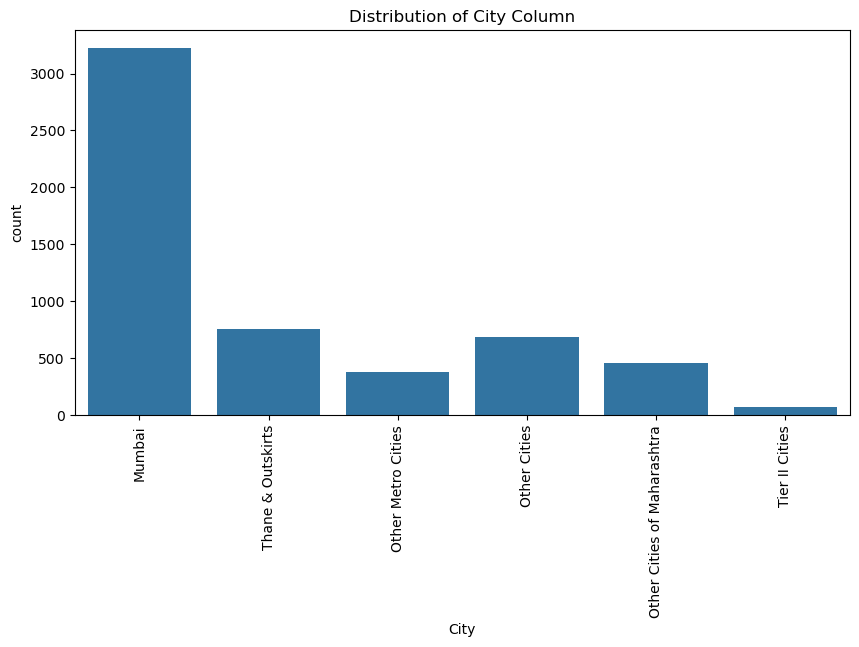

In [31]:
#City has 40% missing values
plt.figure(figsize=(10, 5))
sns.countplot(x='City', data=lead_scoring_data)
plt.xticks(rotation=90)
plt.title("Distribution of City Column")
plt.show()

In [32]:
round(lead_scoring_data['City'].value_counts(normalize=True) * 100, 2)

City
Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: proportion, dtype: float64

Mumbai has more values so we assign missing data in City column with Mumbai

In [34]:
lead_scoring_data['City']=lead_scoring_data['City'].replace(np.nan,'Mumbai')

In [35]:
round(lead_scoring_data.isnull().sum()/len(lead_scoring_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

All missing values are within 2% so we drop these rows

In [37]:
lead_scoring_data.dropna(inplace = True)

In [38]:
round(lead_scoring_data.isnull().sum()/len(lead_scoring_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [39]:
#As we can see that their no missing values so we will find the percentage of row retained
(len(lead_scoring_data.index)/9240)*100

98.2034632034632

Retained 98% of the rows

In [41]:
lead_scoring_data[lead_scoring_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Univariate and Bivariate analysis

In [43]:
Converted = (sum(lead_scoring_data['Converted'])/len(lead_scoring_data['Converted'].index))*100
Converted

37.85541106458012

In [44]:
print(lead_scoring_data['Lead Origin'].dtype)
print(lead_scoring_data['Converted'].dtype)

object
int64


In [45]:
lead_scoring_data['Lead Origin'] = lead_scoring_data['Lead Origin'].astype(str)
lead_scoring_data['Converted'] = lead_scoring_data['Converted'].astype(str)

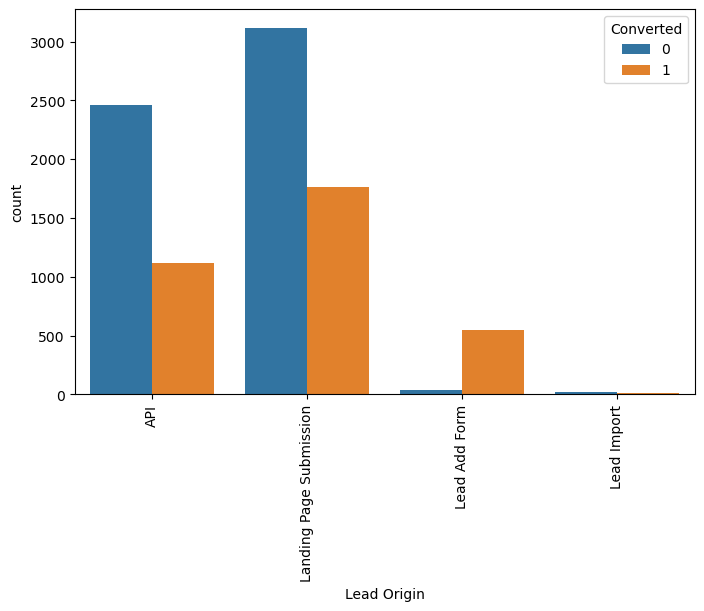

In [46]:
plt.figure(figsize=(8, 5))
s1 = sns.countplot(x='Lead Origin', hue='Converted', data=lead_scoring_data)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

To improve the conversion rate, then need to improve lead conversion of API and Landing page submission origin and generate more lead from lead add form 

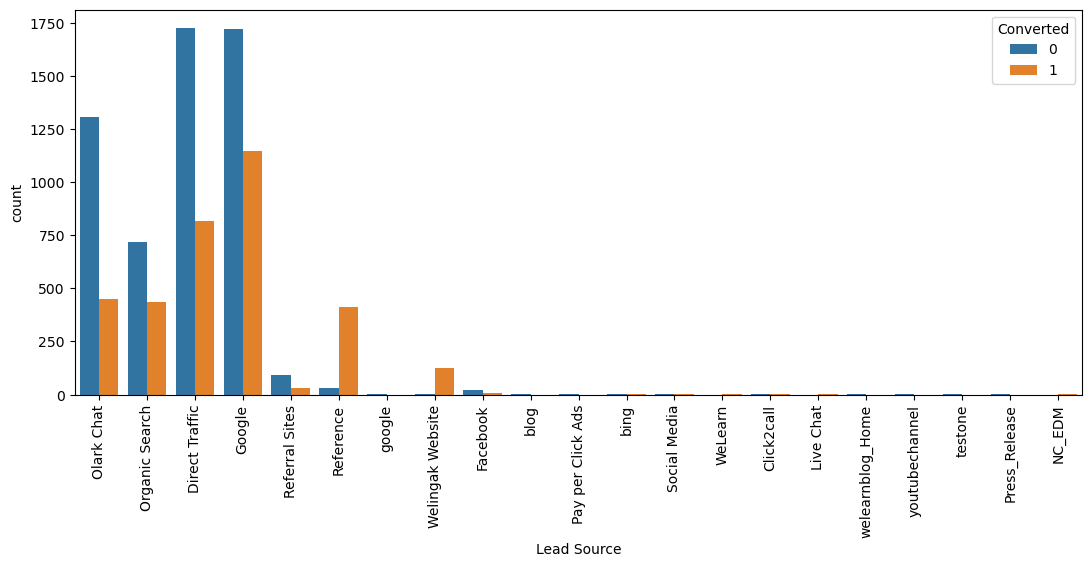

In [48]:
plt.figure(figsize=(13,5))
s1 = sns.countplot(x='Lead Source', hue='Converted', data=lead_scoring_data)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [49]:
#Replace google with Google
lead_scoring_data['Lead Source'] = lead_scoring_data['Lead Source'].replace(['google'], 'Google')

In [50]:
# Create the new category 'Others' for some of the Lead Sources which don't have much values.
lead_scoring_data['Lead Source'] = lead_scoring_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


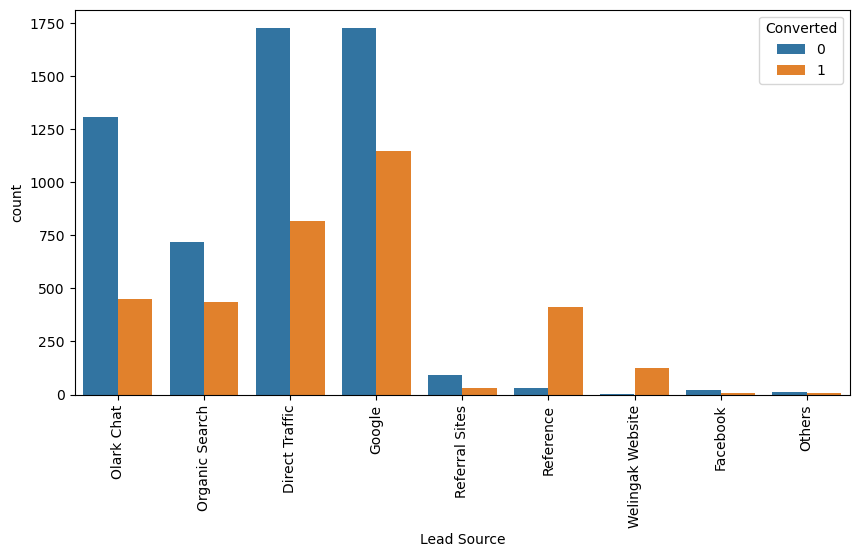

In [51]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(x='Lead Source', hue='Converted', data=lead_scoring_data)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

Now focusing on lead conversion of Olark chatr, organic chat, direct traffic, google and even generate more leads from reference and welingak website

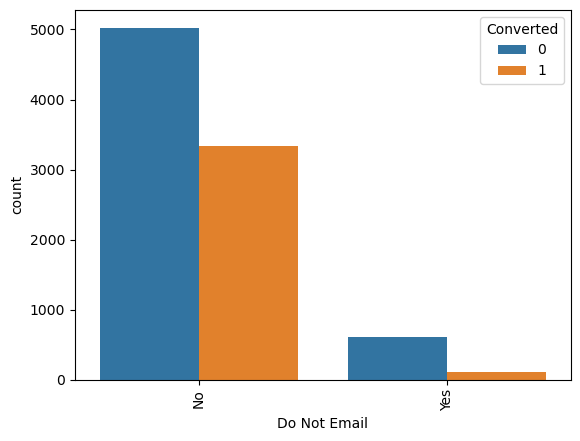

In [53]:
s1 = sns.countplot(x='Do Not Email', hue='Converted', data=lead_scoring_data)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

Their are more number of No 

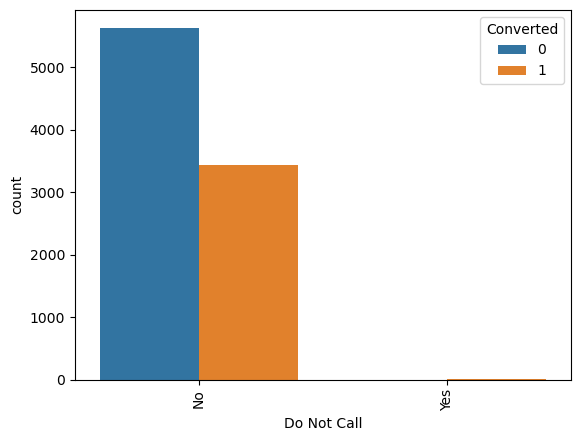

In [55]:
s1 = sns.countplot(x='Do Not Call', hue='Converted', data=lead_scoring_data)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

## Checking Outliers

In [57]:
lead_scoring_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: ylabel='TotalVisits'>

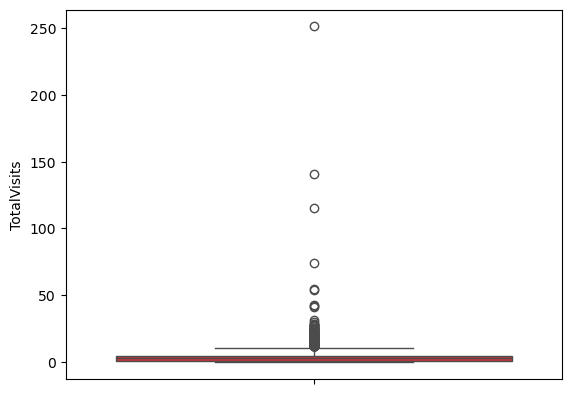

In [58]:
sns.boxplot(lead_scoring_data['TotalVisits'],orient='vert',palette='Set1')

There are large number of outliers present in the TotalVisits. We will encape the values between 0.05 to 0.95 persentile

In [60]:
percentiles = lead_scoring_data['TotalVisits'].quantile([0.05,0.95]).values
lead_scoring_data['TotalVisits'][lead_scoring_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_scoring_data['TotalVisits'][lead_scoring_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='TotalVisits'>

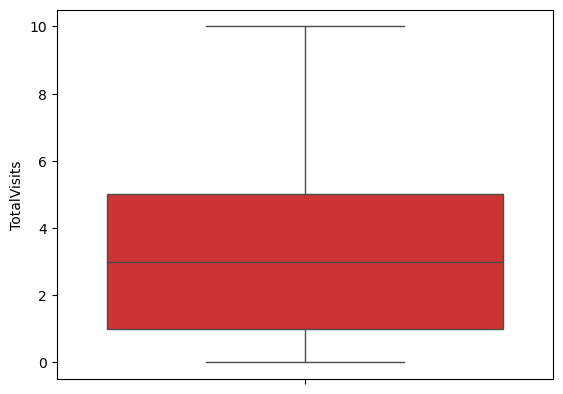

In [61]:
sns.boxplot(lead_scoring_data['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

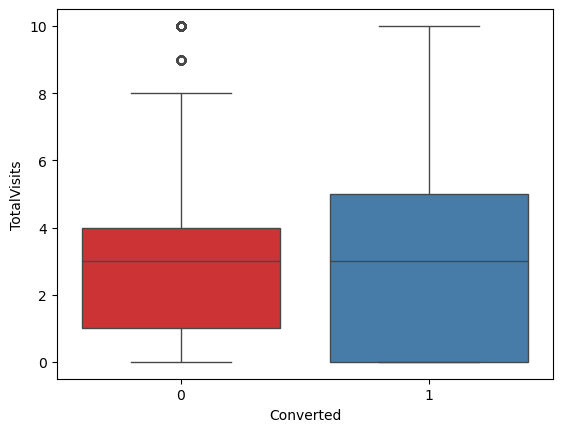

In [62]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_scoring_data,palette='Set1')

Median for converted and unconverted is same

In [64]:
lead_scoring_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: ylabel='Total Time Spent on Website'>

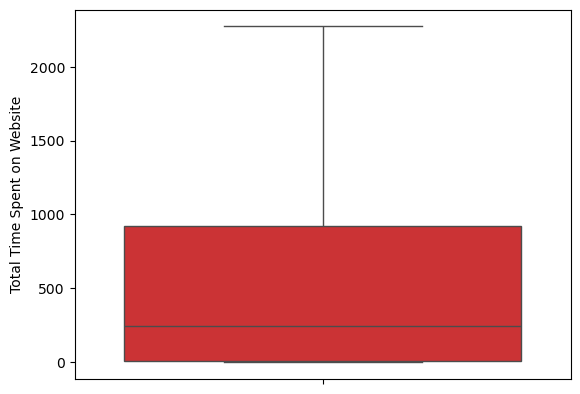

In [65]:
sns.boxplot(lead_scoring_data['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

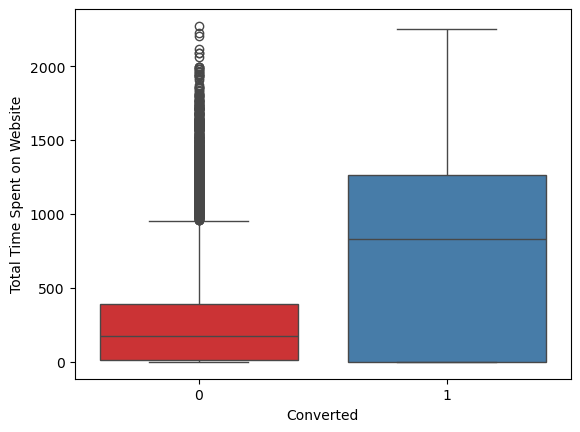

In [66]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_scoring_data,palette='Set1')

In [67]:
lead_scoring_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: ylabel='Page Views Per Visit'>

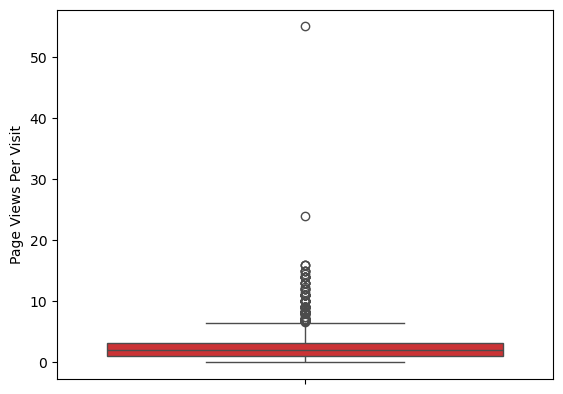

In [68]:
sns.boxplot(lead_scoring_data['Page Views Per Visit'],orient='vert',palette='Set1')

There are large number of outliers present in the Page Views Per Visit. We will encape the values between 0.05 to 0.95 persentile

In [70]:
percentiles = lead_scoring_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_scoring_data['Page Views Per Visit'][lead_scoring_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_scoring_data['Page Views Per Visit'][lead_scoring_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='Page Views Per Visit'>

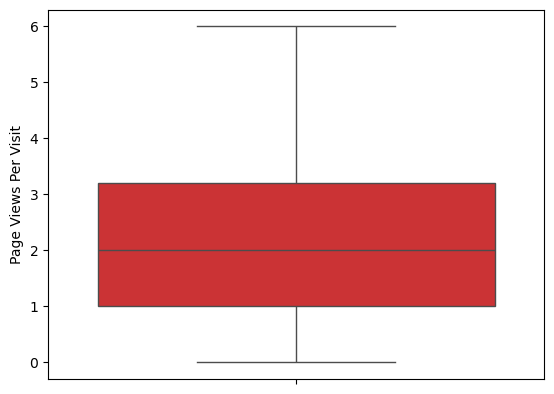

In [71]:
sns.boxplot(lead_scoring_data['Page Views Per Visit'],palette='Set1',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

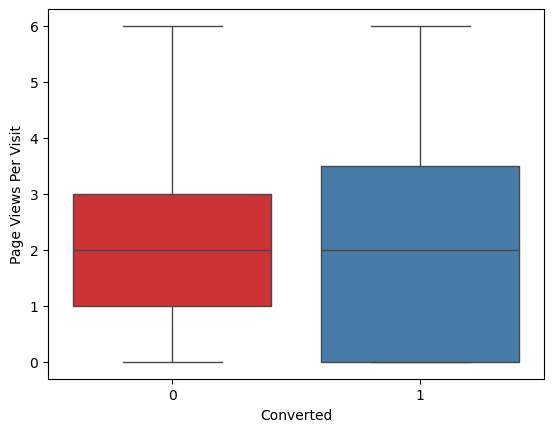

In [72]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_scoring_data,palette='Set1')

In [73]:
#Nothing from page views per visit can be said
lead_scoring_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

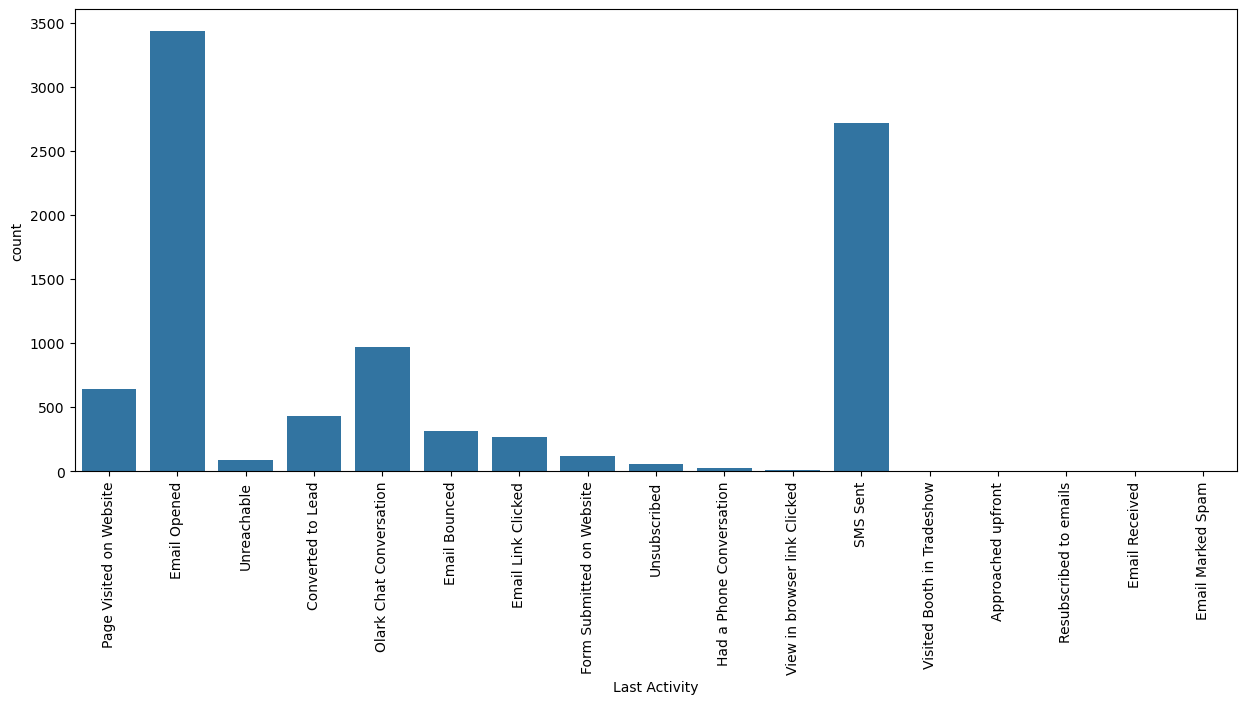

In [74]:
plt.figure(figsize=(15,6))
sns.countplot(x="Last Activity", data=lead_scoring_data)
plt.xticks(rotation = 90)
plt.show()

We will put all the last activities under the "Other_Activity" title as they have very less number of data.

In [76]:
lead_scoring_data['Last Activity'] = lead_scoring_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

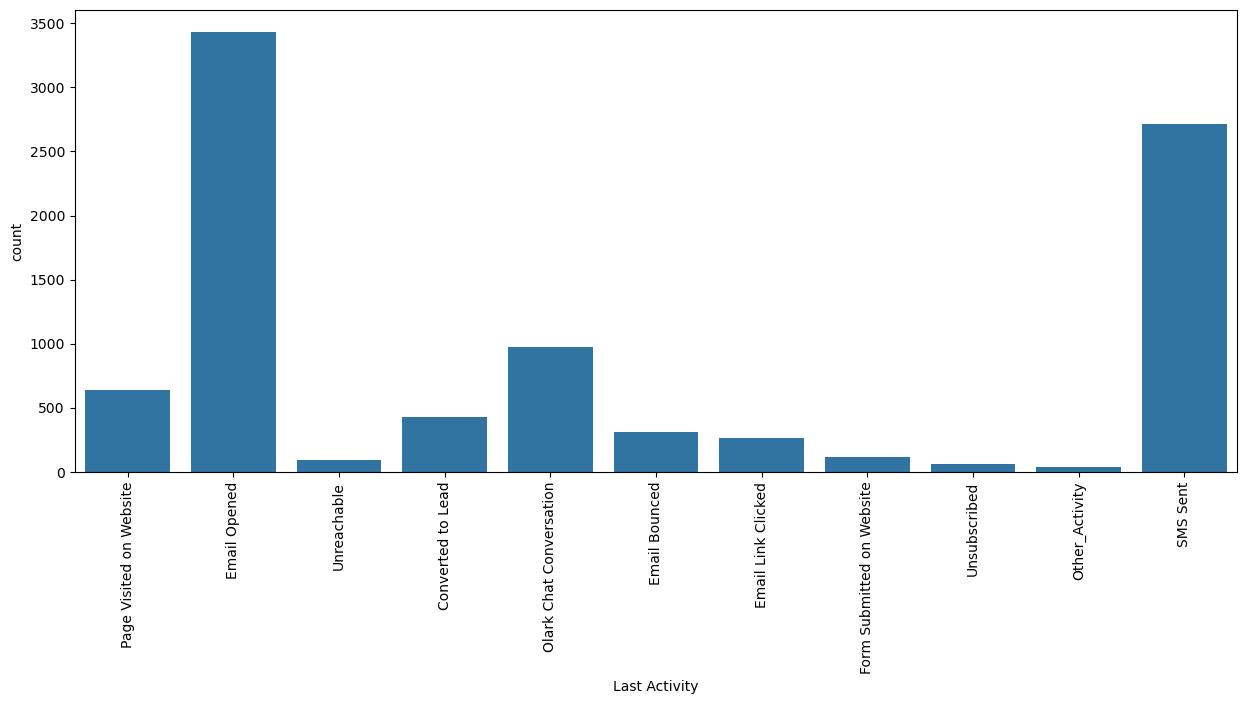

In [77]:
plt.figure(figsize=(15,6))
sns.countplot(x="Last Activity", data=lead_scoring_data)
plt.xticks(rotation = 90)
plt.show()

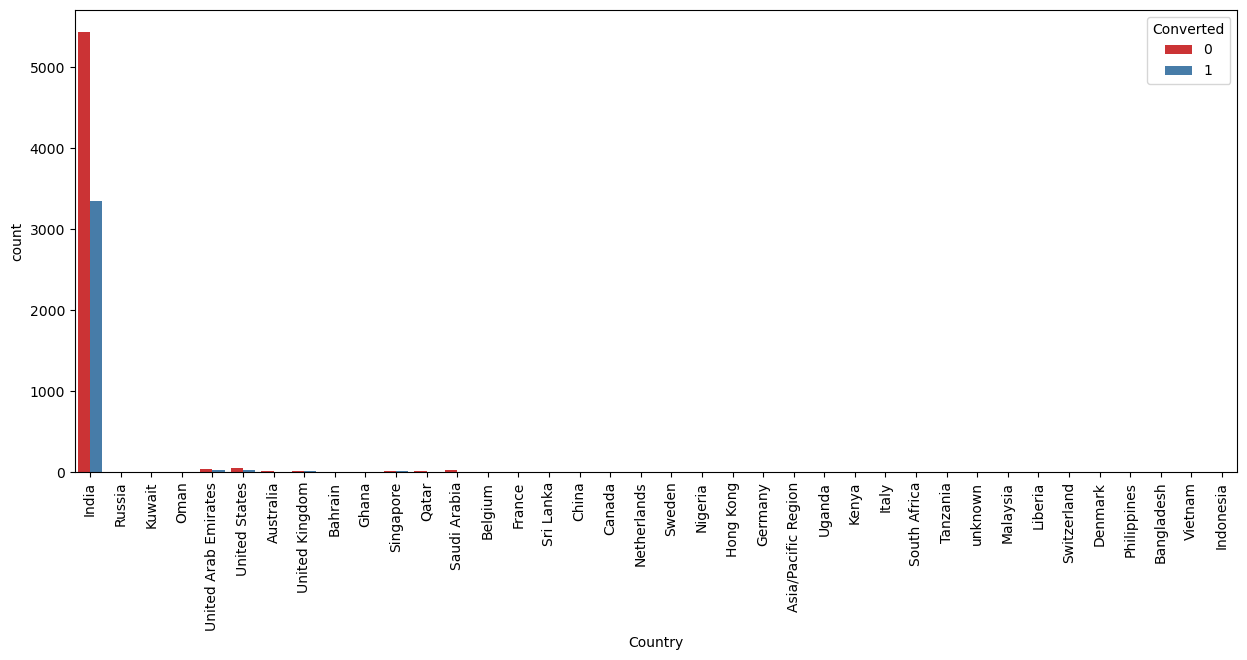

In [78]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

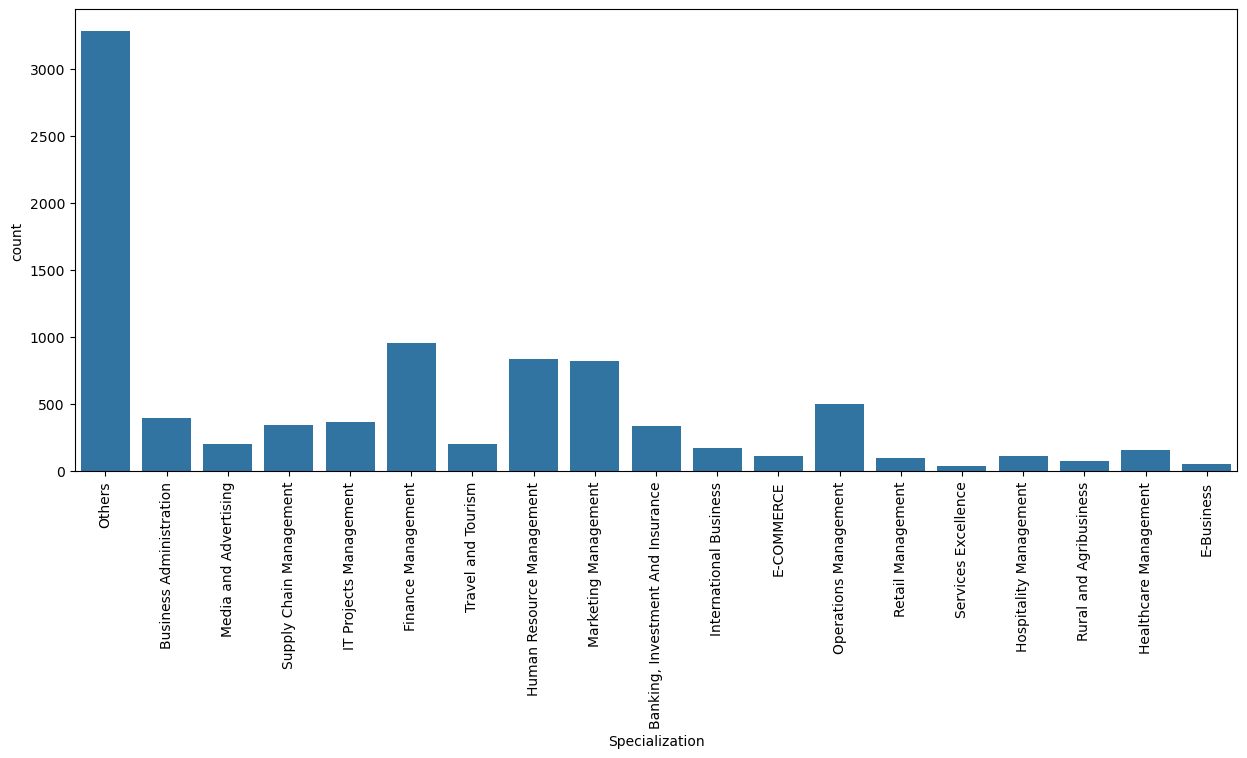

In [79]:
#India has more values and no ointeference can be drawn from that 
plt.figure(figsize=(15, 6))
sns.countplot(x="Specialization", data=lead_scoring_data)
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

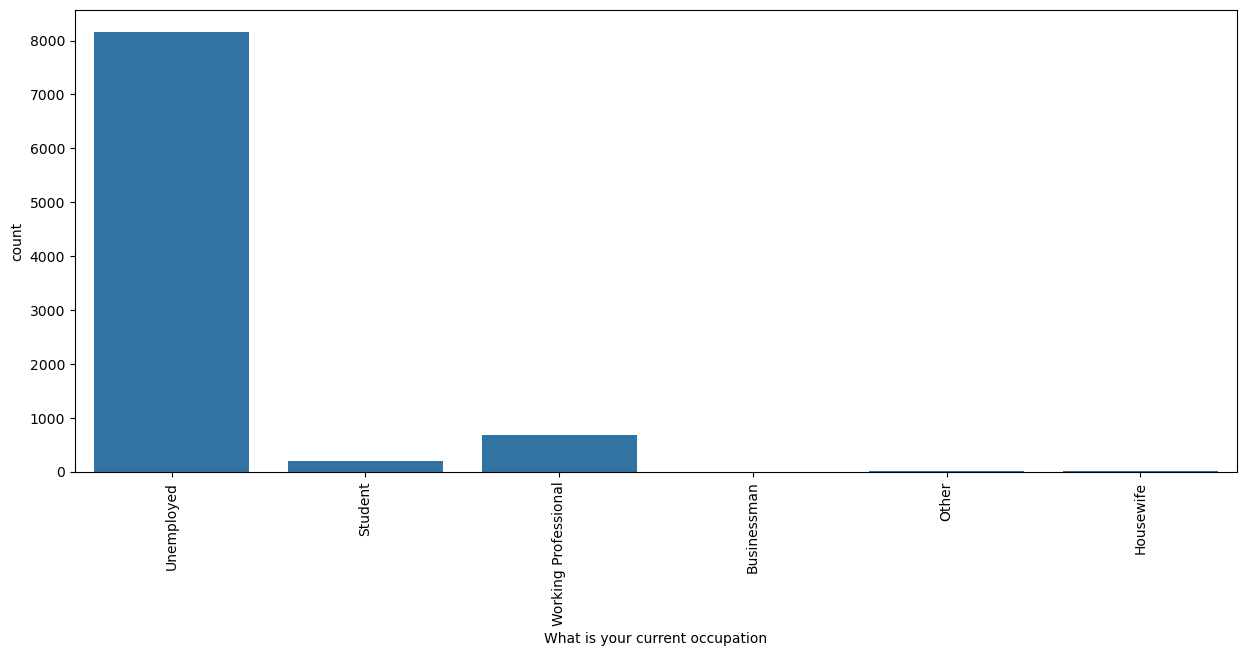

In [80]:
plt.figure(figsize=(15,6))
sns.countplot(x="What is your current occupation", data=lead_scoring_data)
plt.xticks(rotation = 90)

Unemployed are more in numbers 

Working professionals have more chances of joining course

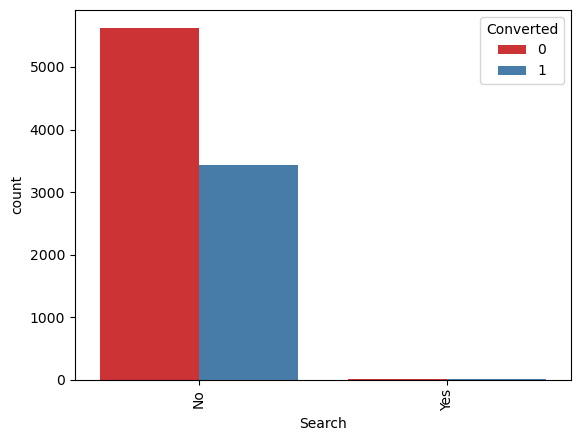

In [82]:
sns.countplot(x = "Search", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

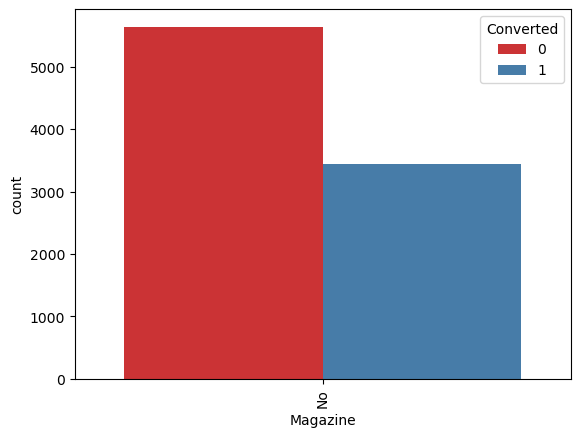

In [83]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

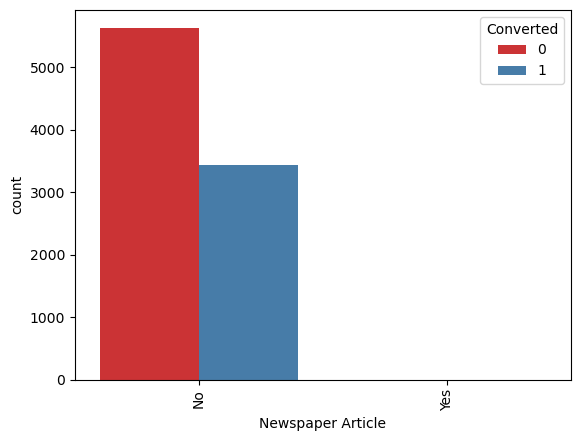

In [84]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

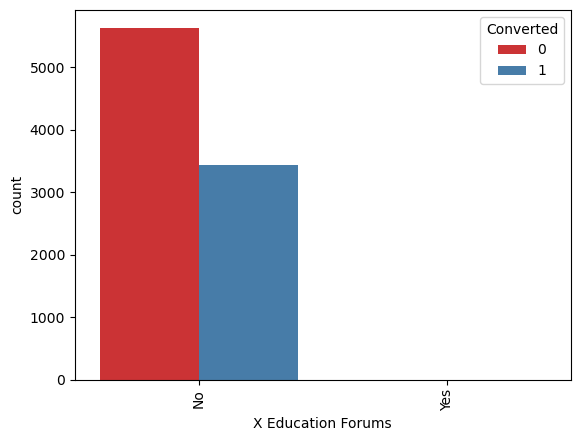

In [85]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

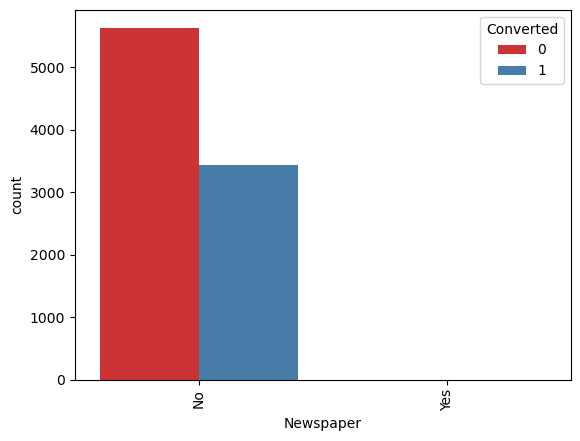

In [86]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

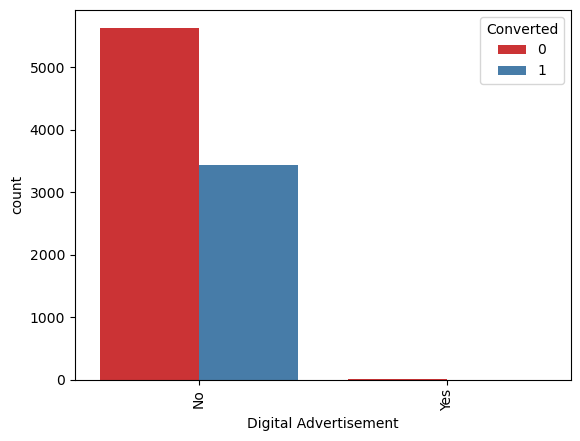

In [87]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

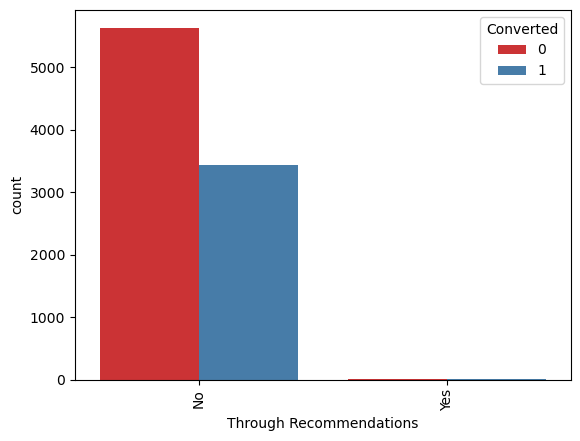

In [88]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

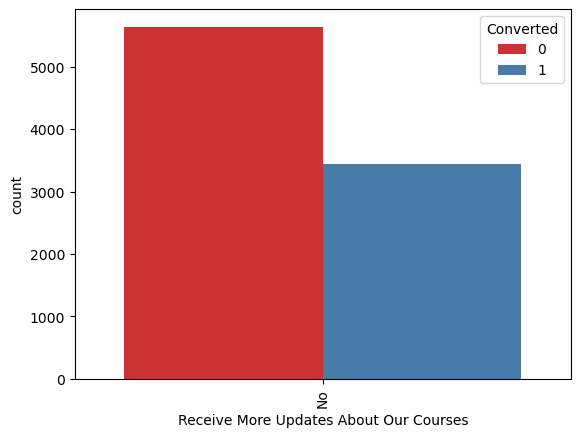

In [89]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

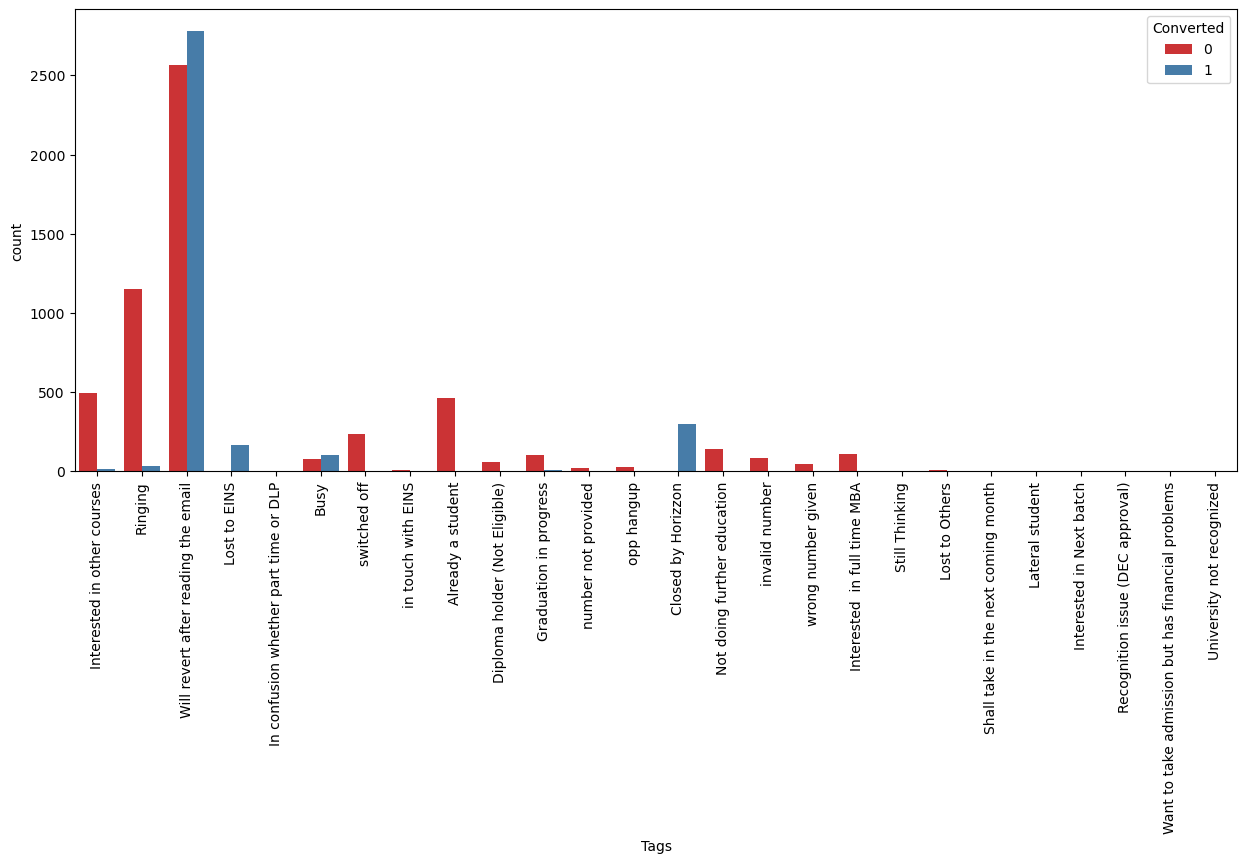

In [90]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

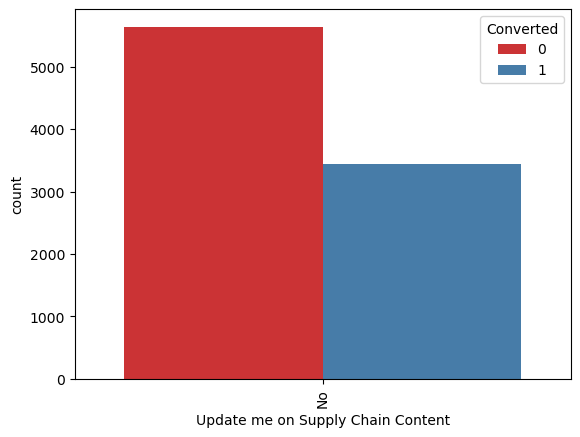

In [91]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

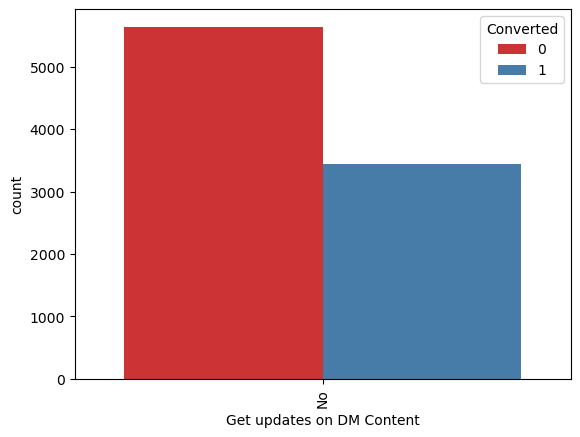

In [92]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

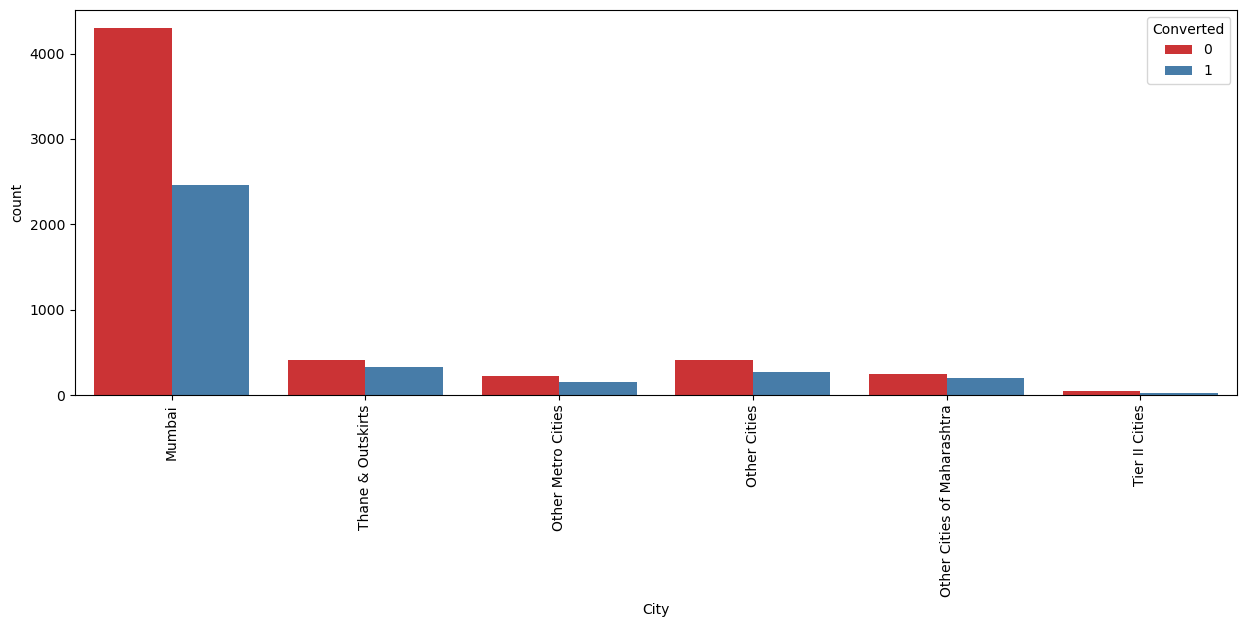

In [93]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

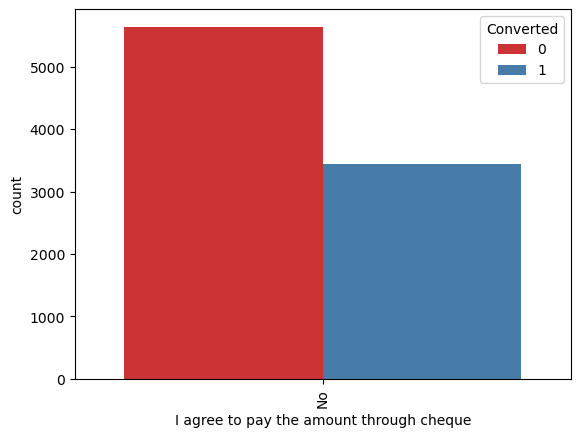

In [94]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

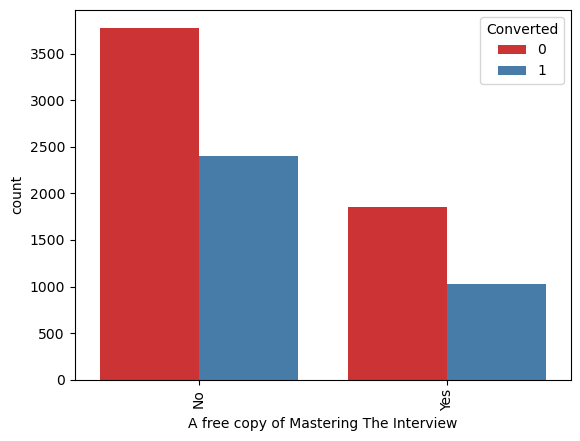

In [95]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

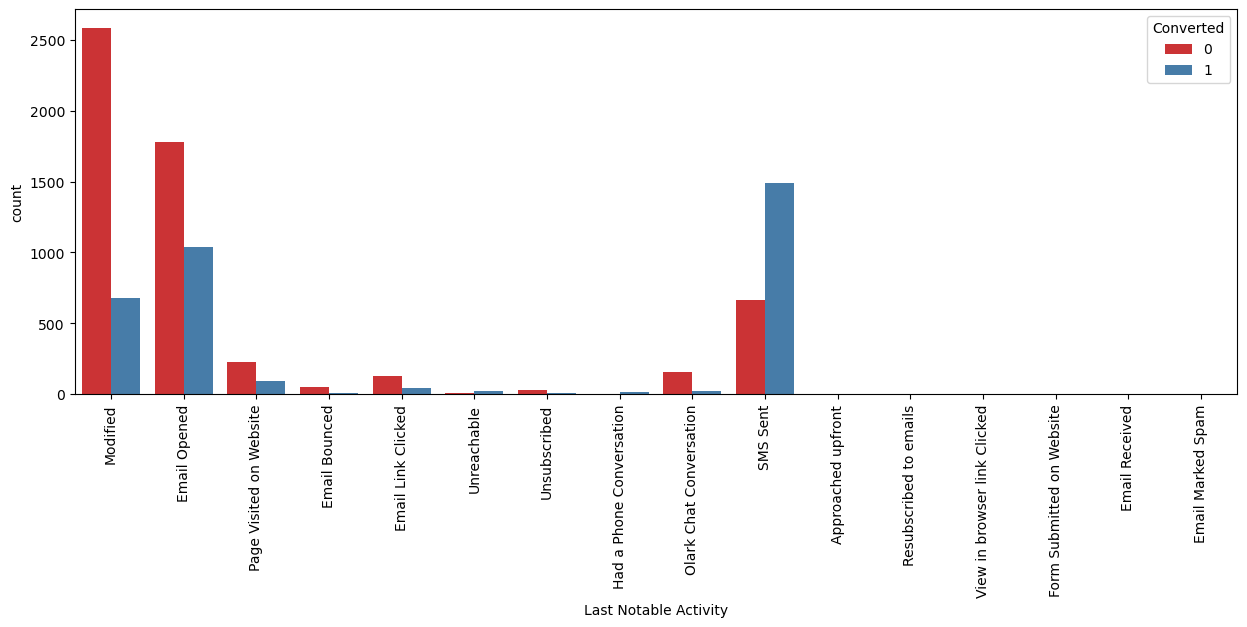

In [96]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_scoring_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

The variables such as Tags, Country, Magazine, Newspaper Article, and X Education Forums, have limited variability and lacked meaningful contribution to the analysis. For instance, columns like Country may have a single dominant value. So, I have decided to not include this variables in the model.

In [98]:
#Result
lead_scoring_data = lead_scoring_data.drop(['Lead Number', 'Tags', 'Country', 'Search', 'Magazine', 
                                            'Newspaper Article', 'X Education Forums', 'Newspaper', 
                                            'Digital Advertisement', 'Through Recommendations', 
                                            'Receive More Updates About Our Courses', 
                                            'Update me on Supply Chain Content', 
                                            'Get updates on DM Content', 
                                            'I agree to pay the amount through cheque', 
                                            'A free copy of Mastering The Interview'], axis=1)

In [99]:
lead_scoring_data.shape

(9074, 14)

In [100]:
lead_scoring_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   object 
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

In [101]:
#Data Preparation
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_scoring_data[vars] = lead_scoring_data[vars].apply(binary_map)

## Creating Dummy Variables

In [103]:
#Creating dummy variable for categorical features and drop first one
dummy_lead_data = pd.get_dummies(lead_scoring_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_lead_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [104]:
#Joining dummy_lead_score_data to lead_score_data 
lead_scoring_data = pd.concat([lead_scoring_data, dummy_lead_data], axis=1)
lead_scoring_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,False,False,True,False,False,False,False,False,False,False


In [105]:
#Drop dummy variable
lead_scoring_data = lead_scoring_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [106]:
lead_scoring_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,True,False,False,...,False,False,True,False,False,False,False,False,False,False


# Splitting into Train and Test set

In [108]:
# Put feature variable to X
X_lead = lead_scoring_data.drop(['Prospect ID','Converted'], axis=1)
X_lead.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,2.0,1532,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,2.0,1428,1.0,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [109]:
# Put target variable to y
y_lead = lead_scoring_data['Converted']

y_lead.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: object

In [110]:
# Convert boolean columns to integer (0 and 1)
X_lead = X_lead.astype(int)

In [111]:
X_lead.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.000220,3.191867,482.887481,2.197818,0.538351,0.064029,0.003306,0.003416,0.316619,...,0.000110,0.001543,0.360040,0.020168,0.035045,0.000110,0.237161,0.003527,0.004959,0.000110
std,0.269608,0.014845,2.780618,545.256560,1.796181,0.498554,0.244818,0.057407,0.058353,0.465183,...,0.010498,0.039251,0.480038,0.140581,0.183904,0.010498,0.425365,0.059283,0.070251,0.010498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,246.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,5.000000,922.750000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,10.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
X_lead.dtypes

Do Not Email                                          int32
Do Not Call                                           int32
TotalVisits                                           int32
Total Time Spent on Website                           int32
Page Views Per Visit                                  int32
                                                      ...  
Last Notable Activity_Resubscribed to emails          int32
Last Notable Activity_SMS Sent                        int32
Last Notable Activity_Unreachable                     int32
Last Notable Activity_Unsubscribed                    int32
Last Notable Activity_View in browser link Clicked    int32
Length: 69, dtype: object

In [113]:
X_lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Do Not Email                                          9074 non-null   int32
 1   Do Not Call                                           9074 non-null   int32
 2   TotalVisits                                           9074 non-null   int32
 3   Total Time Spent on Website                           9074 non-null   int32
 4   Page Views Per Visit                                  9074 non-null   int32
 5   Lead Origin_Landing Page Submission                   9074 non-null   int32
 6   Lead Origin_Lead Add Form                             9074 non-null   int32
 7   Lead Origin_Lead Import                               9074 non-null   int32
 8   Lead Source_Facebook                                  9074 non-null   int32
 9   Le

I believe that all the above colums which i have droped does not play any significant role in generating insigths

In [115]:
# Check for object types
print(X_lead.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [116]:
# Convert boolean columns to integers
X_lead = X_lead.astype(int)

In [117]:
# Check for NaN values
print(X_lead.isna().sum().sum())

0


In [118]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lead, y_lead, train_size=0.7, test_size=0.3, random_state=100)

In [119]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,2,397,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,2,190,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,2,1380,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,5,1584,2,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [120]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: object

# Feature Scaling

In [122]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.116364,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.116364,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.223524,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.116364,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,-0.116364,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [123]:
print(lead_scoring_data["Converted"].dtype)

object


In [124]:
lead_scoring_data["Converted"] = pd.to_numeric(lead_scoring_data["Converted"], errors='coerce')

In [125]:
lead_scoring_data["Converted"] = lead_scoring_data["Converted"].fillna(0)

In [126]:
#Checking lead conversion
Converted = (sum(lead_scoring_data["Converted"]) / len(lead_scoring_data["Converted"])) * 100
print(Converted)

37.85541106458012


# Building Model


Before creating this model, I attempted to create a model using RFE with fifteen and twenty features. I also created a model for this dataset using the backward technique. From these models, I learnt that "Total Time Spent on Website", "Last Activity_Other_Activity", etc. are all crucial factors. For this model, I will employ a forward stepwise technique..

Here I will use the combination of both RFE and manual feature elimination. 

In [130]:
#RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)         
rfe = rfe.fit(X_train, y_train)

In [131]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False])

In [132]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 23),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 33),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 17),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 37),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 16),
 ('Last Activity_SMS Sent', False, 

In [133]:
colmn = X_train.columns[rfe.support_]
colmn

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [134]:
colmn= ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable']
colmn

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_Unsubscribed',
 'Specialization_Others',
 'What is your current occupation_Housewife',
 'What is your current occupation_Working Professional',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_SMS Sent',
 'Last Notable Activity_Unreachable']

It is just a preciousion which I had took in case features generated by RFE get change the code will give error. As me and my patrner and faced this situation so to be on safer side I have put variables in colmn manully which where generated by RFE in my code

In [136]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Ad

In [137]:
# Convert boolean columns to integer (0 and 1)
X_train = X_train.astype(int)


In [138]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.000315,0.012754,0.262321,-0.038262,0.535979,0.068651,0.003779,0.003936,0.320737,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.269581,0.017744,0.794069,0.535213,0.755630,0.498743,0.252879,0.061362,0.062622,0.466797,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
# y_train_np = pd.Series(y_train_np)
# y_train_np = pd.to_numeric(y_train_np, errors='coerce').fillna(0).astype(int)
# y_train_np = y_train_np.values
# Ensure all remaining columns are converted to numeric data types
X_train_reduced = X_train[colmn].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values resulting from the conversion
X_train_reduced = X_train_reduced.dropna()

# Convert y_train to numeric
y_train = pd.Series(y_train).apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [140]:
# Add a constant term for the intercept
X_train_sm = sm.add_constant(X_train_reduced)

# Fit the GLM model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Summary of the new model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.7
Date:                Sat, 14 Dec 2024   Deviance:                       5631.3
Time:                        18:54:32   Pearson chi2:                 6.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3600
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [141]:
# getting predicted values on the train set
y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

3009    0.170298
1012    0.114098
9226    0.214403
4750    0.805423
7987    0.750965
1281    0.519216
2880    0.170298
4971    0.934720
7536    0.750965
1248    0.440318
dtype: float64

In [142]:
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1702985 , 0.11409824, 0.2144029 , 0.8054233 , 0.75096522,
       0.51921591, 0.1702985 , 0.93471965, 0.75096522, 0.44031759])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [144]:
y_train_pred_final= pd.DataFrame({'Converted':y_train.values.astype(int), 'Converted_Prob':y_train_pred})
y_train_pred_final['ProsID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ProsID
0,0,0.170298,3009
1,0,0.114098,1012
2,0,0.214403,9226
3,1,0.805423,4750
4,1,0.750965,7987


In [145]:
y_train_pred_final['predicted']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProsID,predicted
0,0,0.170298,3009,0
1,0,0.114098,1012,0
2,0,0.214403,9226,0
3,1,0.805423,4750,1
4,1,0.750965,7987,1


## Confusion Matrix and Accuracy

In [147]:
# confusion matrix 
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3342  563]
 [ 798 1648]]


In [148]:
# lets check overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7857030388915132


#### Manual Feature Elimination

In [150]:
# checking VIF
vif= pd.DataFrame()
vif['Features'] = X_train[colmn].columns
vif['VIF']= [variance_inflation_factor(X_train[colmn].values, i) for i in range (X_train[colmn].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,Specialization_Others,1.99
4,Lead Source_Olark Chat,1.88
7,Last Activity_Other_Activity,1.56
12,Last Notable Activity_Had a Phone Conversation,1.55
3,Lead Origin_Lead Add Form,1.51
2,Lead Origin_Landing Page Submission,1.49
6,Last Activity_Olark Chat Conversation,1.44
13,Last Notable Activity_SMS Sent,1.42
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.30


Since "What is your current occupation_Housewife" has a very high p-value of 0.999 so I have decided to drop this column

In [152]:
colmn.remove("What is your current occupation_Housewife")
colmn

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_Unsubscribed',
 'Specialization_Others',
 'What is your current occupation_Working Professional',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_SMS Sent',
 'Last Notable Activity_Unreachable']

In [153]:
print(colmn)

['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity', 'Last Activity_Unsubscribed', 'Specialization_Others', 'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable']


In [154]:
# Ensure all remaining columns are converted to numeric data types
X_train_reduced = X_train[colmn].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values resulting from the conversion
X_train_reduced = X_train_reduced.dropna()

# Convert y_train to numeric
y_train = pd.Series(y_train).apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [155]:
# Add a constant term for the intercept
X_train_sm = sm.add_constant(X_train_reduced)

# Fit the GLM model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

# Summary of the new model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2820.7
Date:                Sat, 14 Dec 2024   Deviance:                       5641.4
Time:                        18:54:33   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3590
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [156]:
y_train_pred= res.predict(X_train_sm).values.reshape(-1)
y_train_pred = y_train_pred.reshape(-1)
print(y_train_pred[:10])

[0.1712017  0.11340492 0.21454249 0.80559514 0.75190794 0.51965591
 0.1712017  0.93482203 0.75190794 0.44172597]


In [157]:
y_train_pred_final["Converted_Prob"]= y_train_pred

In [158]:
y_train_pred_final['predicted']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProsID,predicted
0,0,0.171202,3009,0
1,0,0.113405,1012,0
2,0,0.214542,9226,0
3,1,0.805595,4750,1
4,1,0.751908,7987,1


In [159]:
# lets check overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7852306723350654


So over all accuracy has not dropped much

In [161]:
# checking VIF
vif= pd.DataFrame()
vif['Features'] = X_train[colmn].columns
vif['VIF']= [variance_inflation_factor(X_train[colmn].values, i) for i in range (X_train[colmn].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,Specialization_Others,1.99
4,Lead Source_Olark Chat,1.88
7,Last Activity_Other_Activity,1.56
11,Last Notable Activity_Had a Phone Conversation,1.55
3,Lead Origin_Lead Add Form,1.50
2,Lead Origin_Landing Page Submission,1.49
6,Last Activity_Olark Chat Conversation,1.44
12,Last Notable Activity_SMS Sent,1.42
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.30


In [162]:
colmn.remove("Last Notable Activity_Had a Phone Conversation")
colmn

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_Unsubscribed',
 'Specialization_Others',
 'What is your current occupation_Working Professional',
 'Last Notable Activity_SMS Sent',
 'Last Notable Activity_Unreachable']

In [163]:
# Ensure all remaining columns are converted to numeric data types
X_train_reduced = X_train[colmn].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values resulting from the conversion
X_train_reduced = X_train_reduced.dropna()

# Convert y_train to numeric
y_train = pd.Series(y_train).apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [164]:
# Add a constant term for the intercept
X_train_sm = sm.add_constant(X_train_reduced)

# Fit the GLM model
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()

# Summary of the new model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.4
Date:                Sat, 14 Dec 2024   Deviance:                       5644.7
Time:                        18:54:34   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [165]:
y_train_pred= res.predict(X_train_sm).values.reshape(-1)
y_train_pred = y_train_pred.reshape(-1)
print(y_train_pred[:10])

[0.17162876 0.1121004  0.21393884 0.80566597 0.75153127 0.52039593
 0.17162876 0.93484153 0.75153127 0.44184787]


In [166]:
y_train_pred_final["Converted_Prob"]= y_train_pred

In [167]:
y_train_pred_final['predicted']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProsID,predicted
0,0,0.171629,3009,0
1,0,0.112100,1012,0
2,0,0.213939,9226,0
3,1,0.805666,4750,1
4,1,0.751531,7987,1


In [168]:
# lets check overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7847583057786175


In [169]:
# lets check VIF again
vif= pd.DataFrame()
vif['Features'] = X_train[colmn].columns
vif['VIF']= [variance_inflation_factor(X_train[colmn].values, i) for i in range (X_train[colmn].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,Specialization_Others,1.99
4,Lead Source_Olark Chat,1.88
3,Lead Origin_Lead Add Form,1.50
2,Lead Origin_Landing Page Submission,1.49
6,Last Activity_Olark Chat Conversation,1.44
11,Last Notable Activity_SMS Sent,1.42
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.30
0,Do Not Email,1.18
10,What is your current occupation_Working Profes...,1.18


Since all the p-values are less than 0.05 and vif is less than 5 further, rmoving any variable is not affecting accuracy much and current model explains almost 79% of conversions. So I will stop here

All the features have a good value of vif. So we need not drop any more variables and we can procide with making predictions using this model only.

Metrics Beyond Simply Accuracy(Checking Sensitivity and Specificity)

In [173]:
TP= confusion[1,1]  # true positive
TN= confusion[0,0]  # true negative
FP= confusion[0,1] # false positive
FN= confusion[1,0] # false negative

In [174]:
# lets see the sensitivity of our logistic regression model 
TP/ float(TP+FN)

0.6737530662305805

In [175]:
# Let calculate the speficity 
TN/ float(TN+FP)

0.8558258642765685

In [176]:
# calculating false positive rate- predicting converted when customer is not converted 
print(FP/ float(TN+FP))

0.1441741357234315


In [177]:
# positive precditive value
print(TP/ float(TP+FP))

0.7453640886476708


In [178]:
# Negative Predctive Value
print(TN/ float(TN+FN))

0.8072463768115942


# ROC Curve

In [180]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds= metrics.roc_curve(actual,probs, drop_intermediate=False)
    auc_score= metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    return None

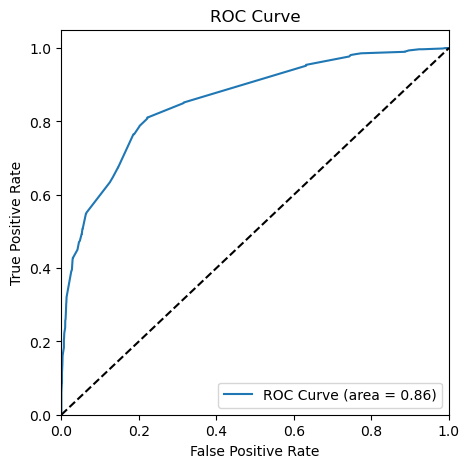

In [181]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Oputimal Cutoff

In [183]:
# lets create column with diffferent optimal cutoff
numbers= [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProsID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.171629,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.112100,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.213939,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.805666,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.751531,7987,1,1,1,1,1,1,1,1,1,0,0


In [184]:
cutoff_df= pd.DataFrame(columns= ["prob","accuracy","sensi","speci"])

num= [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cml= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1= sum(sum(cml))
    accuracy= (cml[0,0]+ cml[1,1])/total1
    speci= cml[0,0]/ (cml[0,0]+cml[0,1])
    sensi= cml[1,1]/ (cml[1,1]+cml[1,0])
    cutoff_df.loc[i]= [i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.518973  0.985691  0.226633
0.2   0.2  0.748701  0.849550  0.685531
0.3   0.3  0.789482  0.811120  0.775928
0.4   0.4  0.789797  0.807032  0.779001
0.5   0.5  0.784758  0.673344  0.854545
0.6   0.6  0.776886  0.507768  0.945455
0.7   0.7  0.772792  0.493459  0.947759
0.8   0.8  0.750118  0.392069  0.974392
0.9   0.9  0.711856  0.269828  0.988732


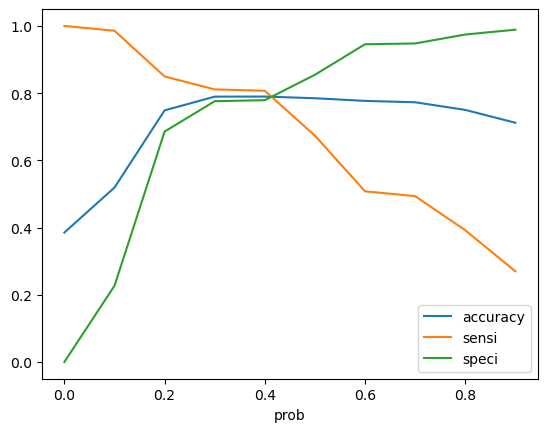

In [185]:
# lets plot the graph for sensitivity and specificity for varioys probabilities.
cutoff_df.plot.line(x='prob',y=["accuracy","sensi","speci"])
plt.show()

I will choose my optimal cut-off point to be 0.4 because:
- It has high accuracy (0.789797)
- It provides a good balance between sensitivity (0.807032) and specificity (0.779001)

# Model Evaluation

In [188]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [189]:
y_train_pred_final.head()

,Converted,Converted_Prob,ProsID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.171629,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.112100,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.213939,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.805666,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.751531,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [190]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3042,  863],
       [ 472, 1974]], dtype=int64)

In [191]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7897968823807274


In [192]:
TP= confusion2[1,1]  # true positive
TN= confusion2[0,0]  # true negative
FP= confusion2[0,1] # false positive
FN= confusion2[1,0] # false negative

In [193]:
# Let calculate the speficity 
TN/ float(TN+FP)

0.7790012804097312

In [194]:
# lets see the sensitivity of our logistic regression model 
TP/ float(TP+FN)

0.8070318887980377

In [195]:
FN

472

# Precision and Recall

In [197]:
confusion2

array([[3042,  863],
       [ 472, 1974]], dtype=int64)

In [198]:
# Precision
TP/(TP+FP)

0.6958054282692986

In [199]:
# Recall
TP/(TP+FN)

0.8070318887980377

In [200]:
# finding precision and recall using sklearn 
precision_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.6958054282692986

In [201]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.8070318887980377

### Precision and Recall Trade-off

In [203]:
p, r, thresholds= precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

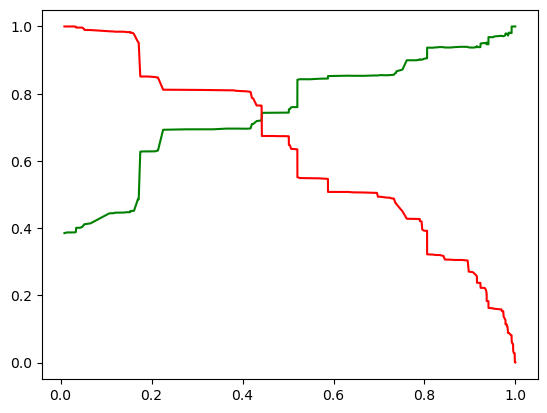

In [204]:
plt.plot(thresholds,p[:-1], "g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

# Making Predictions(On Test set)

In [206]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [207]:
X_test= X_test[colmn]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0


In [208]:
X_test_sm= sm.add_constant(X_test)

In [209]:
y_test_pred= res.predict(X_test_sm)

In [210]:
y_test_pred[:10]

3271    0.079125
1490    0.972571
7936    0.065472
4216    0.721282
3830    0.086118
1800    0.508543
6507    0.311673
4821    0.251993
4223    0.784152
4714    0.076382
dtype: float64

In [211]:
# converting y_test_pred to a dataframe
y_pred_1= pd.DataFrame(y_test_pred)

In [212]:
y_pred_1.head()

,0
3271,0.079125
1490,0.972571
7936,0.065472
4216,0.721282
3830,0.086118


In [213]:
# converting Y-test to a dataframe
y_test_df= pd.DataFrame(y_test).astype(int)

In [214]:
# putting custID to index
y_test_df['Cust_ID']= y_test_df.index

In [215]:
# Removing index from both dataframe to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [216]:
y_pred_final= pd.concat([y_test_df,y_pred_1], axis=1)

In [217]:
y_pred_final.head()

,Converted,Cust_ID,0
0,0,3271,0.079125
1,1,1490,0.972571
2,0,7936,0.065472
3,1,4216,0.721282
4,0,3830,0.086118


In [218]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={0:"Converted_Prob"})

In [219]:
# Rearraning the columns
y_pred_final= y_pred_final.reindex(["Cust_ID","Converted","Converted_Prob"], axis=1)

In [220]:
y_pred_final.head()

,Cust_ID,Converted,Converted_Prob
0,3271,0,0.079125
1,1490,1,0.972571
2,7936,0,0.065472
3,4216,1,0.721282
4,3830,0,0.086118


In [221]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [222]:
y_pred_final.head()

,Cust_ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.079125,0
1,1490,1,0.972571,1
2,7936,0,0.065472,0
3,4216,1,0.721282,1
4,3830,0,0.086118,0


In [223]:
y_pred_final.dtypes

Cust_ID              int64
Converted            int32
Converted_Prob     float64
final_predicted      int64
dtype: object

In [224]:
metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.8053617333822989

In [225]:
confusion3= metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)

In [226]:
confusion3

array([[1476,  258],
       [ 272,  717]], dtype=int64)

In [227]:
TP= confusion3[1,1]  # true positive
TN= confusion3[0,0]  # true negative
FP= confusion3[0,1] # false positive
FN= confusion3[1,0] # false negative

In [228]:
# lets see the sensitivity of our logistic regression model 
TP/ float(TP+FN)

0.7249747219413549

In [229]:
# Let calculate the speficity 
TN/ float(TN+FP)

0.8512110726643599

On the test Dataset we were able to achieve the accuracy of approximately 81%, sensitivity of 72% and specificity of 85%

In [231]:
y_true = y_pred_final['Converted'] 
y_pred = y_pred_final['final_predicted']

In [232]:
f1 = f1_score(y_true, y_pred) 
print("F1 Score:", f1)

F1 Score: 0.730142566191446


In [233]:
auc = roc_auc_score(y_true, y_pred_final['Converted_Prob']) 
print("AUC Score:", auc)

AUC Score: 0.8642676127133182
